In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
covid = pd.read_csv('covid_19_world.csv')

In [3]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
85633,85634,08/12/2020,Zaporizhia Oblast,Ukraine,2020-08-13 04:29:15,971.0,22.0,680.0
85634,85635,08/12/2020,Zeeland,Netherlands,2020-08-13 04:29:15,950.0,69.0,0.0
85635,85636,08/12/2020,Zhejiang,Mainland China,2020-08-13 04:29:15,1275.0,1.0,1268.0
85636,85637,08/12/2020,Zhytomyr Oblast,Ukraine,2020-08-13 04:29:15,2215.0,48.0,1574.0
85637,85638,08/12/2020,Zuid-Holland,Netherlands,2020-08-13 04:29:15,15765.0,1314.0,0.0


In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85638 entries, 0 to 85637
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              85638 non-null  int64  
 1   ObservationDate  85638 non-null  object 
 2   Province/State   57341 non-null  object 
 3   Country/Region   85638 non-null  object 
 4   Last Update      85638 non-null  object 
 5   Confirmed        85638 non-null  float64
 6   Deaths           85638 non-null  float64
 7   Recovered        85638 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.2+ MB


In [6]:
covid.drop('SNo',axis=1,inplace=True)

In [7]:
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])

In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85638 entries, 0 to 85637
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  85638 non-null  datetime64[ns]
 1   Province/State   57341 non-null  object        
 2   Country/Region   85638 non-null  object        
 3   Last Update      85638 non-null  object        
 4   Confirmed        85638 non-null  float64       
 5   Deaths           85638 non-null  float64       
 6   Recovered        85638 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 4.6+ MB


In [9]:
covid.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [10]:
covid = covid.set_index('ObservationDate')

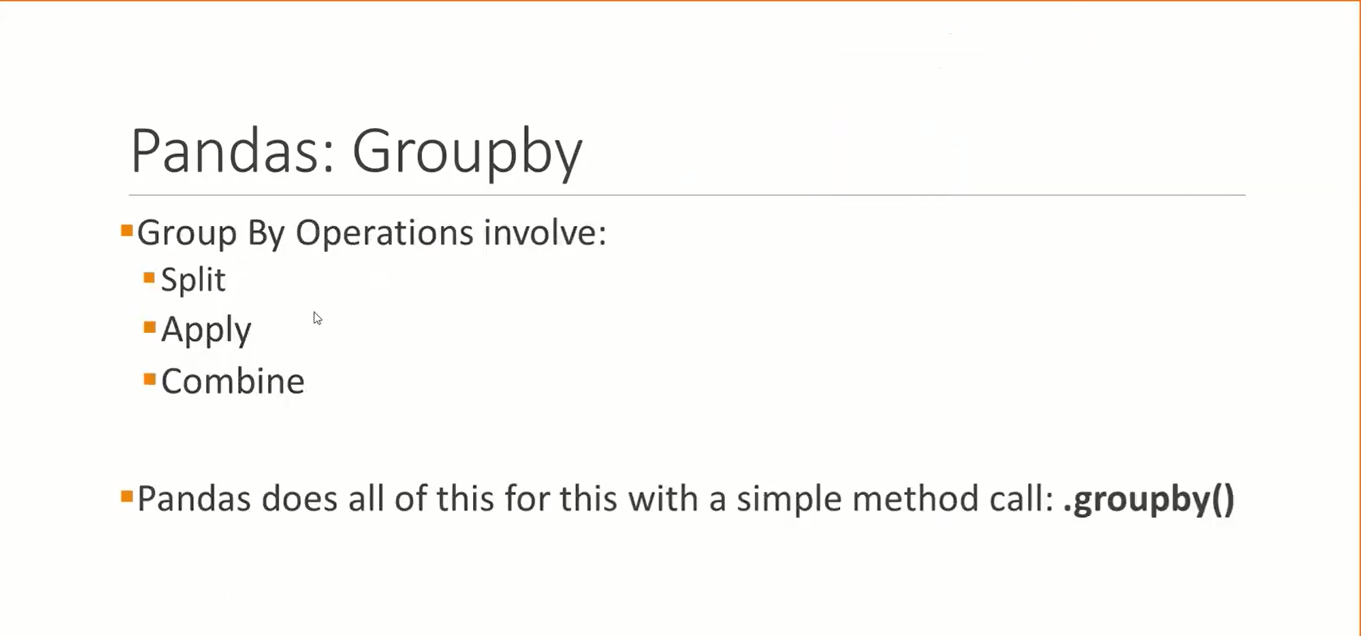

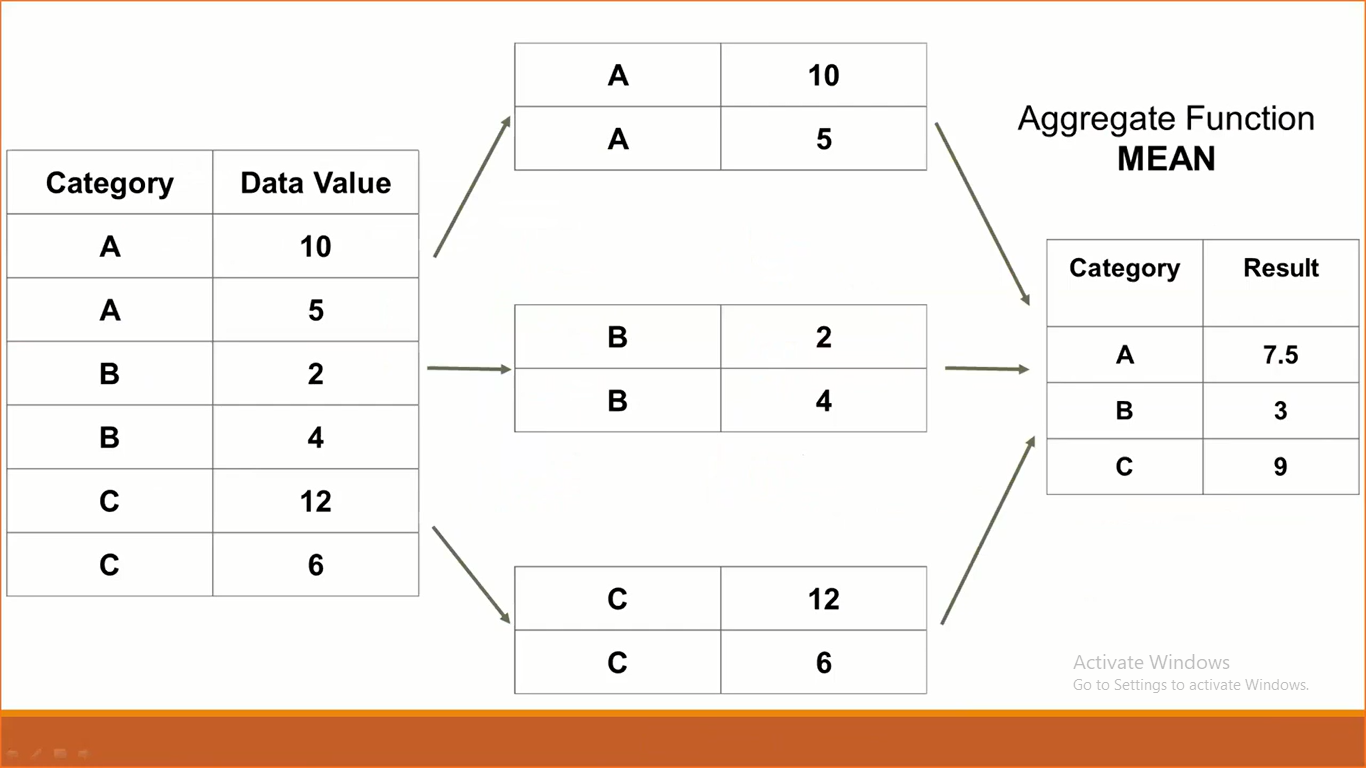

In [11]:
datewise_covid = covid.groupby(['ObservationDate']).agg({'Confirmed': 'sum','Deaths':'sum','Recovered':'sum'})

In [12]:
datewise_covid.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


Text(0.5, 1.0, 'Datewise Confirmed Cases')

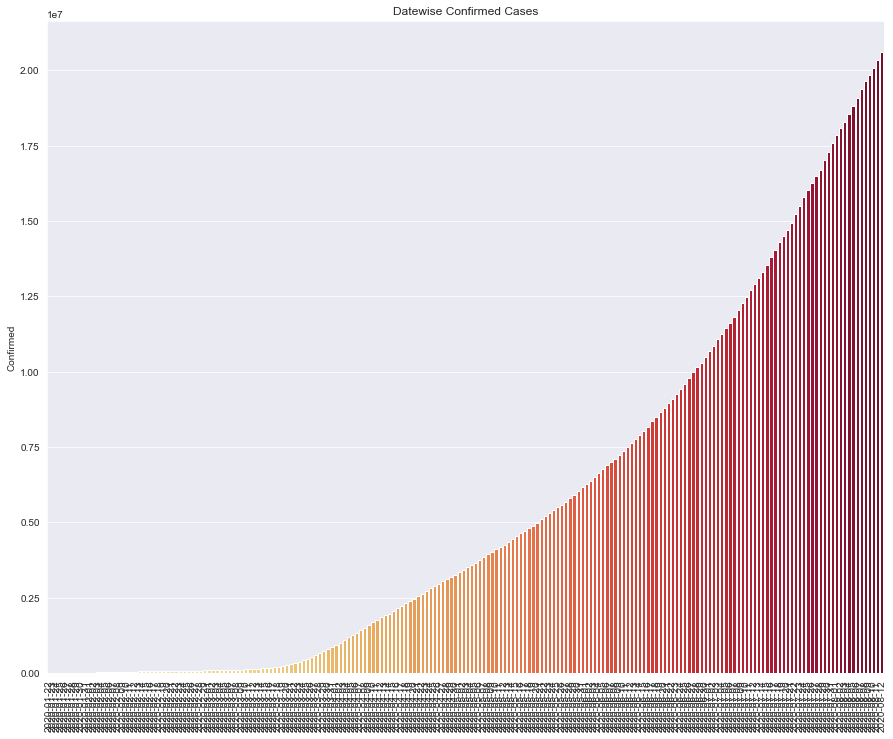

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,12))
sns.barplot(x = datewise_covid.index.date,y = datewise_covid['Confirmed'],palette='YlOrRd')
plt.xticks(rotation=90)
plt.title('Datewise Confirmed Cases')

In [14]:
#A mortality rate is a measure of the frequency of occurrence of death in a defined population during a specified interval.
datewise_covid['Mortality Rate'] = (datewise_covid['Deaths']/datewise_covid['Confirmed'])*100

In [15]:
datewise_covid.head()

,Confirmed,Deaths,Recovered,Mortality Rate
ObservationDate,,,,
2020-01-22,555.0,17.0,28.0,3.063063
2020-01-23,653.0,18.0,30.0,2.756508
2020-01-24,941.0,26.0,36.0,2.763018
2020-01-25,1438.0,42.0,39.0,2.920723
2020-01-26,2118.0,56.0,52.0,2.644004


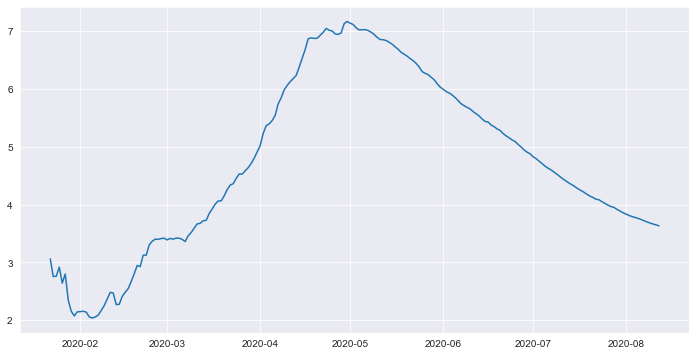

In [16]:
plt.figure(figsize=(12,6))
plt.plot(datewise_covid['Mortality Rate'],label="Mortality Rate")
#plt.xticks(rotation=90)
plt.show()

In [17]:
India_data = covid[covid['Country/Region']=='India']

In [18]:
datewise_india = India_data.groupby(['ObservationDate']).agg({'Confirmed': 'sum','Deaths':'sum','Recovered':'sum'})

In [19]:
datewise_india.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,1.0,0.0,0.0
2020-01-31,1.0,0.0,0.0
2020-02-01,1.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,3.0,0.0,0.0


In [20]:
datewise_india['Mortality Rate'] = (datewise_india['Deaths']/datewise_india['Confirmed'])*100

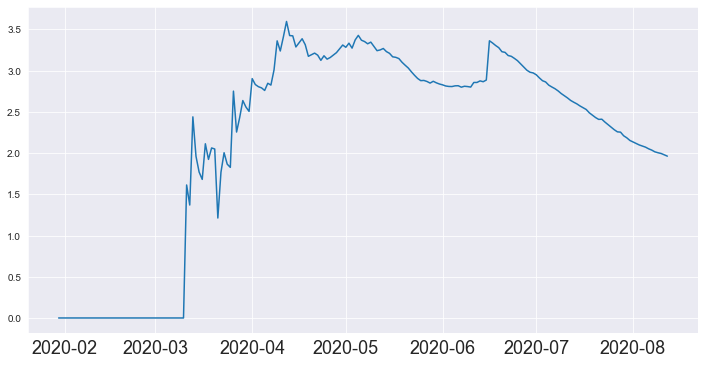

In [21]:
plt.figure(figsize=(12,6))
plt.plot(datewise_india['Mortality Rate'],label="Mortality Rate")
plt.xticks(fontsize=18)
plt.show()

In [22]:
datewise_india['Recovery Rate'] = (datewise_india['Recovered']/datewise_india['Confirmed'])*100

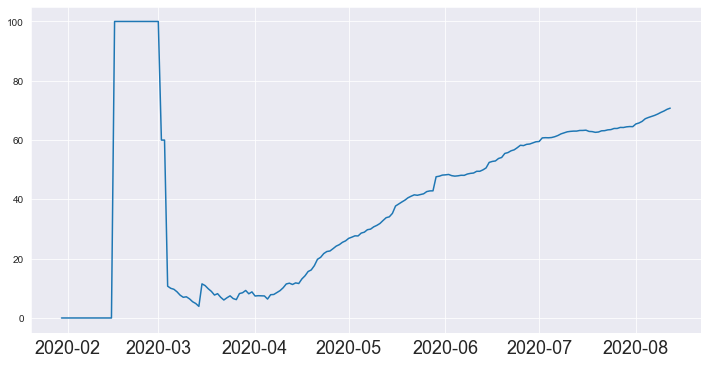

In [23]:
plt.figure(figsize=(12,6))
plt.plot(datewise_india['Recovery Rate'],label="Recovery Rate")
plt.xticks(fontsize=18)
plt.show()

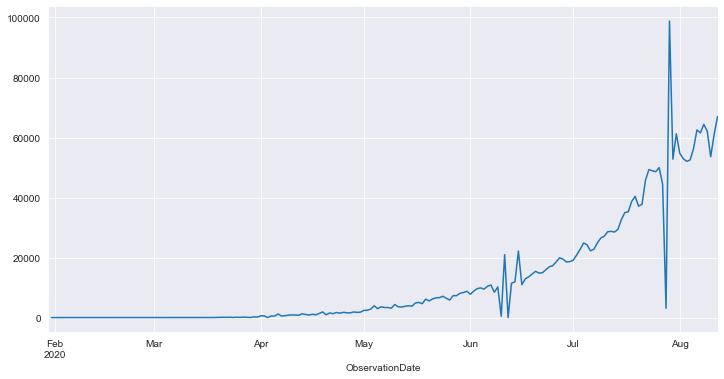

In [24]:
plt.figure(figsize=(12,6))
datewise_india['Confirmed'].diff().plot()

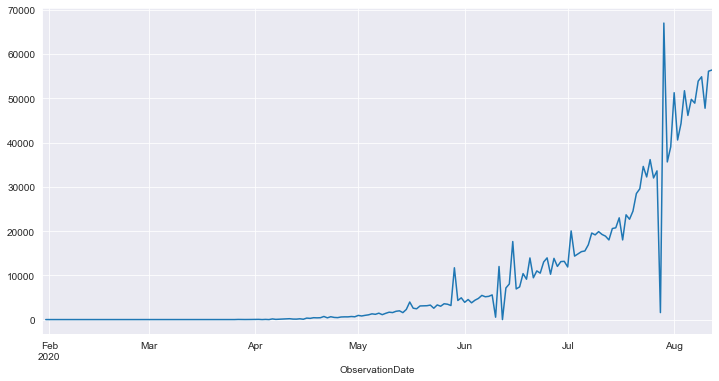

In [25]:
plt.figure(figsize=(12,6))
datewise_india['Recovered'].diff().plot()

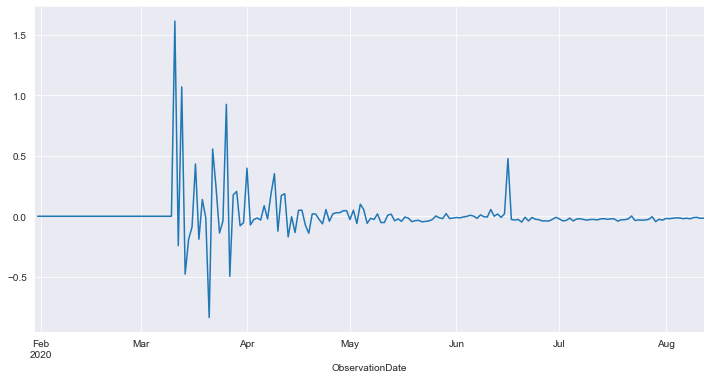

In [26]:
plt.figure(figsize=(12,6))
datewise_india['Mortality Rate'].diff().plot()

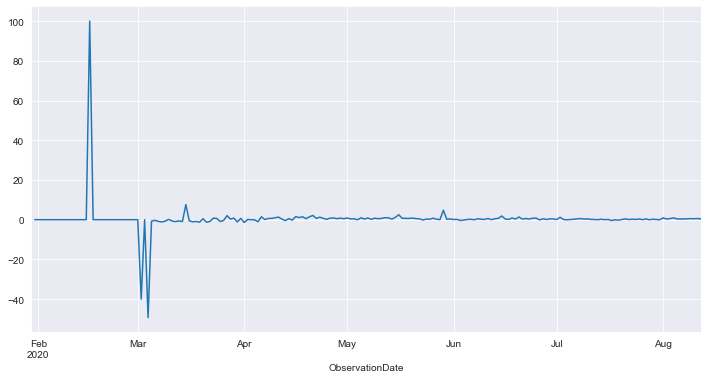

In [27]:
plt.figure(figsize=(12,6))
datewise_india['Recovery Rate'].diff().plot()

###### &&&&&